In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime
import requests

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1300)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1300)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

541

In [12]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass    


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | esperance
Processing Record 2 of Set 1 | vao
Processing Record 3 of Set 1 | juegang
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | bathsheba
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 1 | bardiyah
Processing Record 10 of Set 1 | san cristobal
Processing Record 11 of Set 1 | hofn
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | kutum
Processing Record 17 of Set 1 | cap malheureux
Processing Record 18 of Set 1 | kainantu
Processing Record 19 of Set 1 | iquitos
Processing Record 20 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 21 of Set 1 | coihaique
Processing Record 22 of

Processing Record 38 of Set 4 | ordzhonikidze
Processing Record 39 of Set 4 | arteaga
Processing Record 40 of Set 4 | oranjemund
Processing Record 41 of Set 4 | hamilton
Processing Record 42 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 43 of Set 4 | caravelas
Processing Record 44 of Set 4 | bonfim
Processing Record 45 of Set 4 | maldonado
Processing Record 46 of Set 4 | tripoli
Processing Record 47 of Set 4 | taiobeiras
Processing Record 48 of Set 4 | yeppoon
Processing Record 49 of Set 4 | pacific grove
Processing Record 50 of Set 4 | dmytrivka
Processing Record 1 of Set 5 | buchanan
Processing Record 2 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 5 | cukai
Processing Record 4 of Set 5 | praia da vitoria
Processing Record 5 of Set 5 | bachaquero
Processing Record 6 of Set 5 | bethel
Processing Record 7 of Set 5 | sinop
Processing Record 8 of Set 5 | grindavik
Processing Record 9 of Set 5 | port lincoln
Processing Record 10 of 

Processing Record 27 of Set 8 | awbari
Processing Record 28 of Set 8 | minggang
Processing Record 29 of Set 8 | ilula
Processing Record 30 of Set 8 | labytnangi
Processing Record 31 of Set 8 | maceio
Processing Record 32 of Set 8 | baykit
Processing Record 33 of Set 8 | nokaneng
Processing Record 34 of Set 8 | tura
Processing Record 35 of Set 8 | san joaquin
Processing Record 36 of Set 8 | yilan
Processing Record 37 of Set 8 | perugia
Processing Record 38 of Set 8 | roald
Processing Record 39 of Set 8 | shenjiamen
Processing Record 40 of Set 8 | sitka
Processing Record 41 of Set 8 | mtwara
Processing Record 42 of Set 8 | new lenox
Processing Record 43 of Set 8 | isangel
Processing Record 44 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 45 of Set 8 | pavilosta
Processing Record 46 of Set 8 | divnomorskoye
Processing Record 47 of Set 8 | tarakan
Processing Record 48 of Set 8 | byron bay
Processing Record 49 of Set 8 | gornopravdinsk
Processing Record 50 of Set 8 

In [14]:
#convert array of dictionaries to Pandas DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.8667,121.9000,80.15,43,99,12.66,AU,2022-12-31 01:00:07
1,Vao,-22.6667,167.4833,78.64,82,85,14.23,NC,2022-12-31 01:05:08
2,Juegang,32.3174,121.1855,45.91,52,0,4.23,CN,2022-12-31 01:05:09
3,Bluff,-46.6000,168.3333,56.39,64,93,14.23,NZ,2022-12-31 01:05:09
4,Bathsheba,13.2167,-59.5167,79.41,78,75,17.27,BB,2022-12-31 01:05:09
5,Arraial Do Cabo,-22.9661,-42.0278,74.07,90,100,15.95,BR,2022-12-31 01:05:10
6,Ushuaia,-54.8000,-68.3000,37.96,93,30,3.13,AR,2022-12-31 01:02:00
7,Bardiyah,31.7561,25.0865,61.21,67,100,9.84,LY,2022-12-31 01:05:13
8,San Cristobal,7.7669,-72.2250,65.19,81,41,1.66,VE,2022-12-31 01:05:13
9,Hofn,64.2539,-15.2082,16.54,61,0,13.58,IS,2022-12-31 01:05:14


In [16]:
#reordering DF columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Esperance,AU,2022-12-31 01:00:07,-33.8667,121.9000,80.15,43,99,12.66
1,Vao,NC,2022-12-31 01:05:08,-22.6667,167.4833,78.64,82,85,14.23
2,Juegang,CN,2022-12-31 01:05:09,32.3174,121.1855,45.91,52,0,4.23
3,Bluff,NZ,2022-12-31 01:05:09,-46.6000,168.3333,56.39,64,93,14.23
4,Bathsheba,BB,2022-12-31 01:05:09,13.2167,-59.5167,79.41,78,75,17.27
5,Arraial Do Cabo,BR,2022-12-31 01:05:10,-22.9661,-42.0278,74.07,90,100,15.95
6,Ushuaia,AR,2022-12-31 01:02:00,-54.8000,-68.3000,37.96,93,30,3.13
7,Bardiyah,LY,2022-12-31 01:05:13,31.7561,25.0865,61.21,67,100,9.84
8,San Cristobal,VE,2022-12-31 01:05:13,7.7669,-72.2250,65.19,81,41,1.66
9,Hofn,IS,2022-12-31 01:05:14,64.2539,-15.2082,16.54,61,0,13.58


In [19]:
#creating an output CSV
output_data_file = 'weather_data/cities.csv'
#export city_data into CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

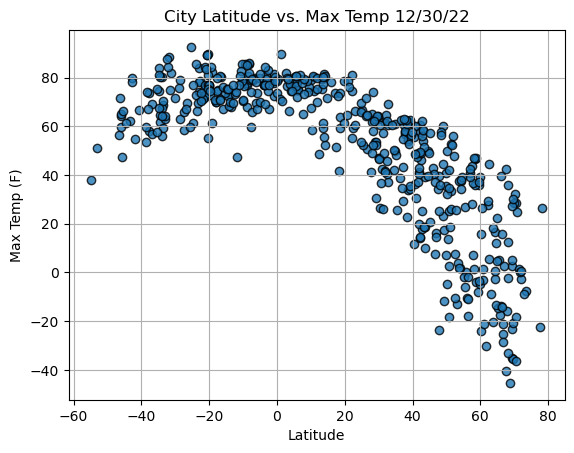

In [24]:
#import time
import time

#build scatter plot for lat vs. max temp
plt.scatter(lats, 
            max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temp "+ time.strftime('%x'))
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.grid(True)

#save figure
plt.savefig('weather_data/Fig1.png')

#show plot
plt.show()

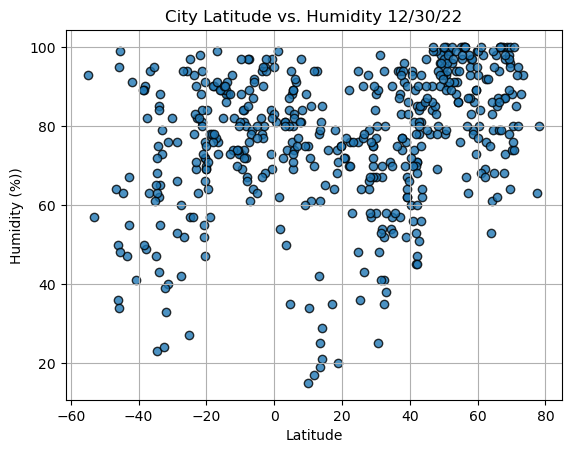

In [25]:
#import time
import time

#build scatter plot for lat vs. humidity
plt.scatter(lats, 
            humidity,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime('%x'))
plt.ylabel('Humidity (%))')
plt.xlabel('Latitude')
plt.grid(True)

#save figure
plt.savefig('weather_data/Fig2.png')

#show plot
plt.show()

In [ ]:
#import time
import time

#build scatter plot for lat vs. cloudiness
plt.scatter(lats, 
            cloudiness,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime('%x'))
plt.ylabel('Cloudiness (%))')
plt.xlabel('Latitude')
plt.grid(True)

#save figure
plt.savefig('weather_data/Fig1.png')

#show plot
plt.show()